# Visualising Data

A fundamental part of the data scientist's toolkit is data visualisation.
Although it is very easy to create visualisations, it is a lot harder to produce *good* ones. 

There are two primary uses for data visualisation:
* To *explore* data
* To *communicate* data

## Matplotlib

If you are interested in producing elaborate interactive visualisations for the web, this is likely not the right choice, however for simple bar charts, line charts and scatterplots, it works pretty well.

In [1]:
from matplotlib import pyplot as plt

In [2]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

In [3]:
# Create a line chart, years on x-axis, gdp on y-axis

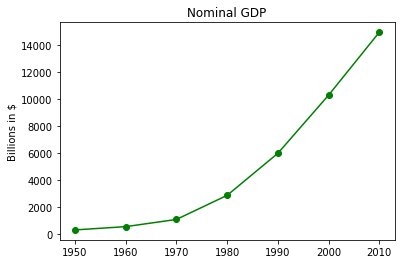

In [4]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title('Nominal GDP')

# add a label to the y-axis
plt.ylabel('Billions in $')
plt.show;

### Bar charts

A bar chart is a good choice when you want to show how some quantity varies among some *discrete* set of items. 
For instance, Figure 3-2 shows how many Academy Awards were won by each of a variety of movies:

In [5]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Ghandi", "West Side Story", ]
num_oscars = [5, 11, 3, 8, 10]

In [6]:
# Plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]

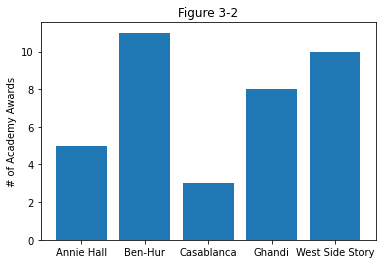

In [7]:
plt.bar(range(len(movies)), num_oscars)

plt.title('Figure 3-2') # adds title
plt.ylabel('# of Academy Awards') # Label the y-axis

# label x-axis with movie names at bar centres
plt.xticks(range(len(movies)), movies)

plt.show();

A bar chart can also be a good choice for plotting histograms of bucketed numeric values, as in the next chart. This helps to visually explore how the values are distributed:

In [8]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

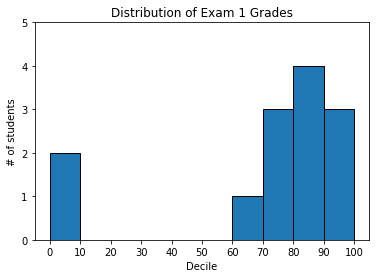

In [9]:
# Bucket grades by decile, but put 100 in with the 90s

histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],    # Shifts bars right by 5
         histogram.values(),                 # Give each bar its correct height
         10,                                 # Give each bar a width of 10
         edgecolor=(0, 0, 0))                # Black edges for each bar


plt.axis([-5, 105, 0, 5])                    # x-axis from -5 to 105
                                             # y-axis from 0 to 5
    
plt.xticks([10 * i for i in range(11)])      # x-axis labels at 0, 10, ..., 100
plt.xlabel('Decile')
plt.ylabel('# of students')
plt.title('Distribution of Exam 1 Grades')
plt.show();

The third argument to `plt.bar` specifies the bar width. Here we chose a width of 10, to fill the entire decile. We also shifted the bars right by 5, so that, for example, the "10" bar (which corresponds to the decile 10-20) would have its centre at 15 and hence occupy the correct range. We also added a thick black edge to each bar to make them visually distinct.

The call to `plt.axis` indicates that we want the x-axis to range from -5 to 105 (just to leave a little spaceon the left and right), and that the y-axis should range from 0 - 5. And the `plt.xticks` puts x-axis labels at 0, 10, 20, ..., 100.

Be judicious when using `plt.axis`. When creating bar charts it is considered especially bad form for your y-axis not to start at 0, since this is an easy way to mislead people:

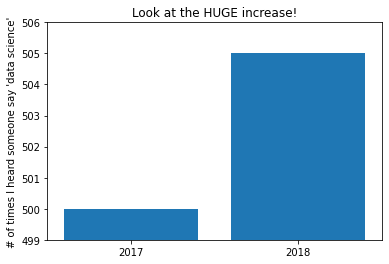

In [13]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# If you don't do this, matplotlib will label the x-axis 0, 1
# and then add +2.013e3 off in the corner
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500

plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the HUGE increase!")
plt.show();

Next we will use more sensible axes, and it looks far less impressive:

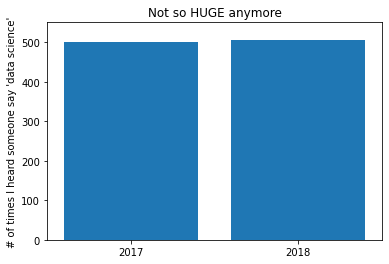

In [15]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# If you don't do this, matplotlib will label the x-axis 0, 1
# and then add +2.013e3 off in the corner
plt.ticklabel_format(useOffset=False)


plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not so HUGE anymore")
plt.show();

## Line charts

As we saw already, we can make line charts using `plt.plot`. These are a good choice for showing *trends*, as illustrated:

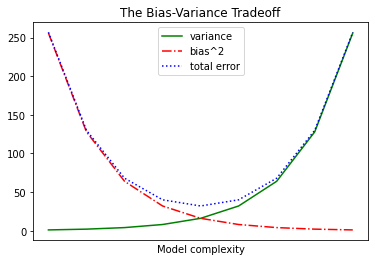

In [16]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') #---- green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') #----red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') #----blue dotted line

# Because we have assigned labels to each series
# we can get a legend for free (loc=9 means "top centre")
plt.legend(loc=9)
plt.xlabel("Model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show();

## Scatterplots

A scatterplot is a right choice for visualising the relationship between two paired sets of data. For example the next graph will illustrate the relationship between the number of friends your users have and the number of minutes they spend on the site every day:

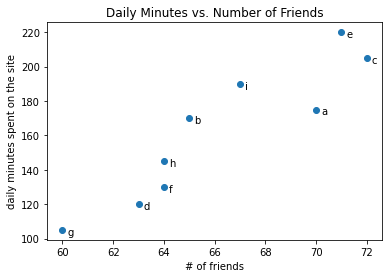

In [19]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                xy=(friend_count, minute_count),# put the label with its point
                xytext=(5, -5),# put slightly offset
                textcoords='offset points')
    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show();